<a href="https://colab.research.google.com/github/Duncan-Sembeguya/US-Exploratory-Data-Analysis/blob/main/us_accidents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('us-accidents-eda')
jovian.set_colab_id('1KV3GX05pUAX_QKTY1hpmqnDk5CXbirXg')

# us-accidents

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/duncansembeguya/us-accidents-eda


'https://jovian.ai/duncansembeguya/us-accidents-eda'

# US ACCIDENTS EXPLORATORY DATA ANALYSIS

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 1.5 million accident records in this dataset. Check here to learn more about this dataset.
https://www.kaggle.com/sobhanmoosavi/us-accidents

It will used to prevent accidents 

DOWNLOAD the data from Kaggle.com

In [ ]:
pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
data_filename = './us-accidents/US_Accidents_Dec20_updated.csv'

## DATA PREPARATIONS AND CLEANING

Data Cleaning is a necessary part before analysis or mining. In this part, we drop or fix illegal data, and transform some data into a better format for further analysis.

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import gc

#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
us_data = pd.read_csv(data_filename)

In [ ]:
us_data

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,NaN,Pomona Fwy E,R,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,NaN,I-8 W,R,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,NaN,Garden Grove Fwy,R,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,NaN,San Diego Fwy S,R,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,F

### SUMMARY STATISTICS

In [ ]:
## Checking information about the data and it's types
us_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

In [ ]:
us_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
## A Summary Distribution of the Variables
us_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [ ]:
## Missing values percentanges
missing_percentages = (us_data.isna().sum().sort_values(ascending = False)/len(us_data))*100
missing_percentages

Number                   69.000715
Precipitation(in)        33.675953
Wind_Chill(F)            29.637007
Wind_Speed(mph)           8.499773
Humidity(%)               3.001786
Visibility(mi)            2.916170
Weather_Condition         2.902714
Temperature(F)            2.838469
Wind_Direction            2.760965
Pressure(in)              2.392643
Weather_Timestamp         1.996222
Airport_Code              0.280199
Timezone                  0.151841
Zipcode                   0.061673
City                      0.005475
Nautical_Twilight         0.005475
Astronomical_Twilight     0.005475
Civil_Twilight            0.005475
Sunrise_Sunset            0.005475
Amenity                   0.000000
Bump                      0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)        

##EXPLORATORY ANALYSIS AND DATA VISUALIZATION

Columns to use for analysis;
  - City
  - Start Time
  - Start lag, Start Long
  - Weather Conditions
 

### Cities

In [ ]:
## Number of cities
cities = us_data.City.unique()
len(cities)

10658

In [ ]:
accidents_per_cities = us_data.City.value_counts()
accidents_per_cities[:10]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Name: City, dtype: int64

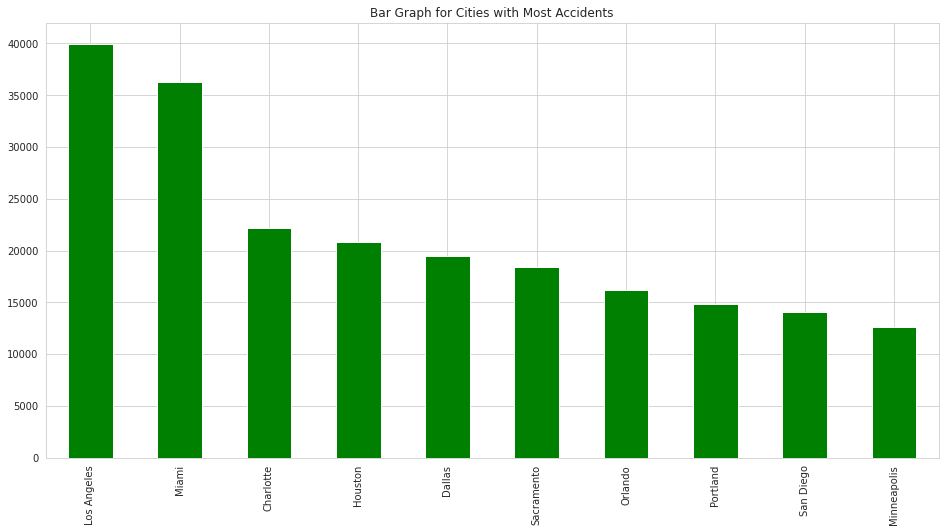

In [ ]:
## Top 10 cities with most accidents
plt.figure(figsize=(16,8))
accidents_per_cities[:10].plot(kind= 'bar', color='green')
plt.title("Bar Graph for Cities with Most Accidents")
plt.show()

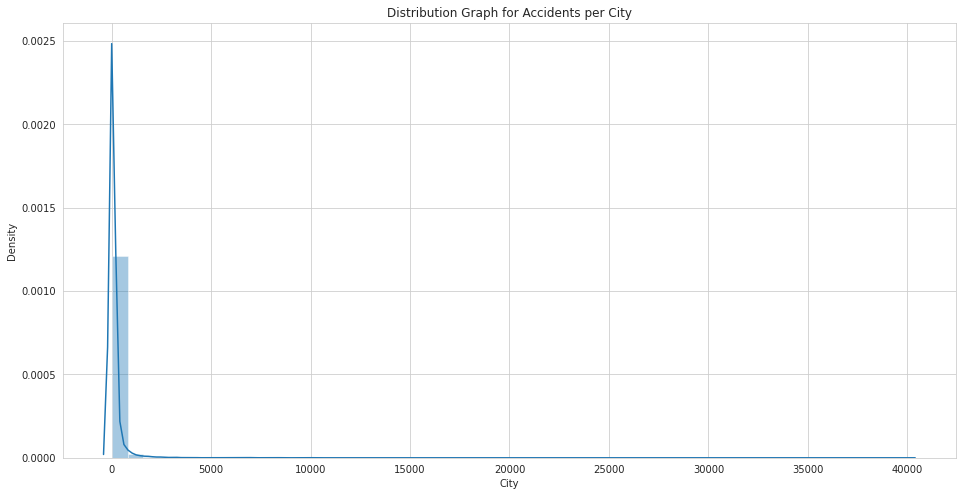

In [ ]:
## Distribution Plot for number of accidents per city
plt.figure(figsize=(16,8))
sns.distplot(accidents_per_cities)
plt.title("Distribution Graph for Accidents per City")
plt.show()


In [ ]:
## Finding high & low accidents cities
high_accident_rates_cities = accidents_per_cities[accidents_per_cities >= 1000]
low_accident_rates_cities = accidents_per_cities[accidents_per_cities < 1000]

In [ ]:
## Percentange of Cites with the high percentanges of accidents 
(len(high_accident_rates_cities)/ len(cities))*100

2.3550384687558643

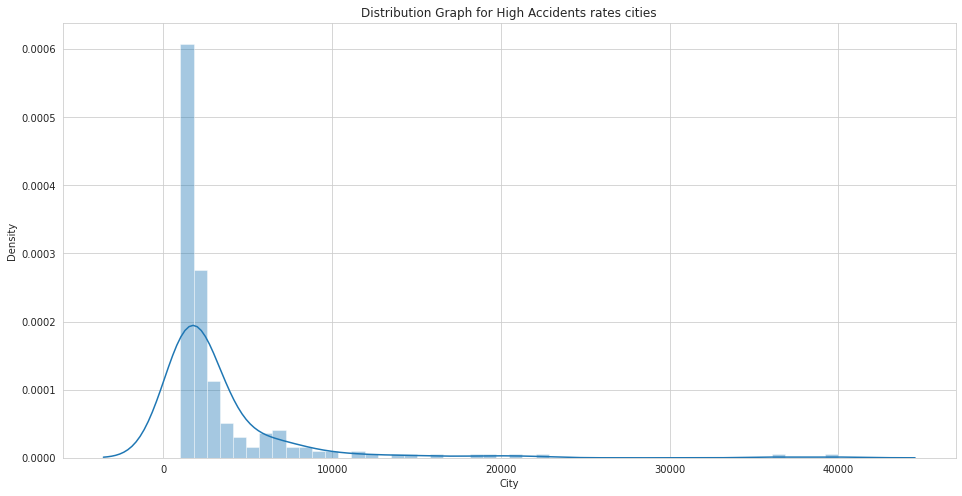

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(high_accident_rates_cities)
plt.title("Distribution Graph for Cities with High Rates Accidents")
plt.show()

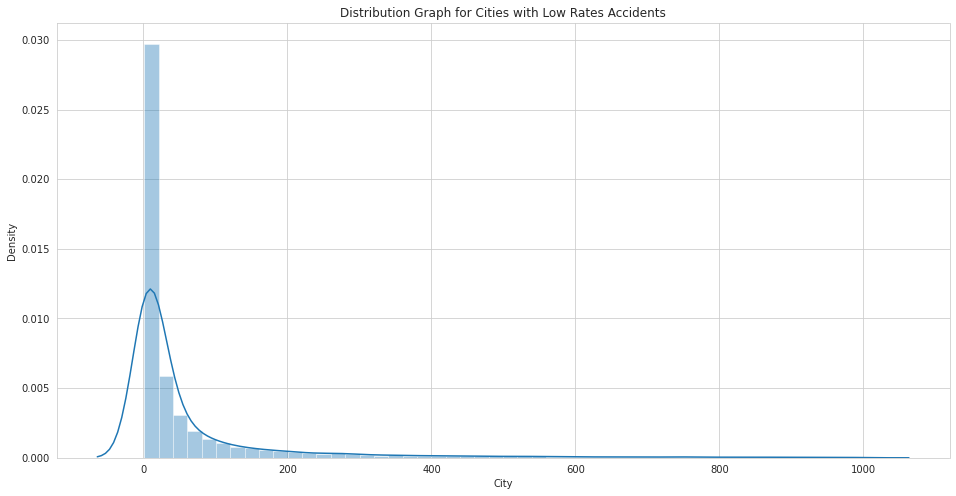

In [ ]:
plt.figure(figsize=(16,8))
sns.distplot(low_accident_rates_cities)
plt.title("Distribution Graph for Cities with Low Rates Accidents")
plt.show()

As shown above all the graphs follow an exponential distribution so we set the log scales and plot a histogram

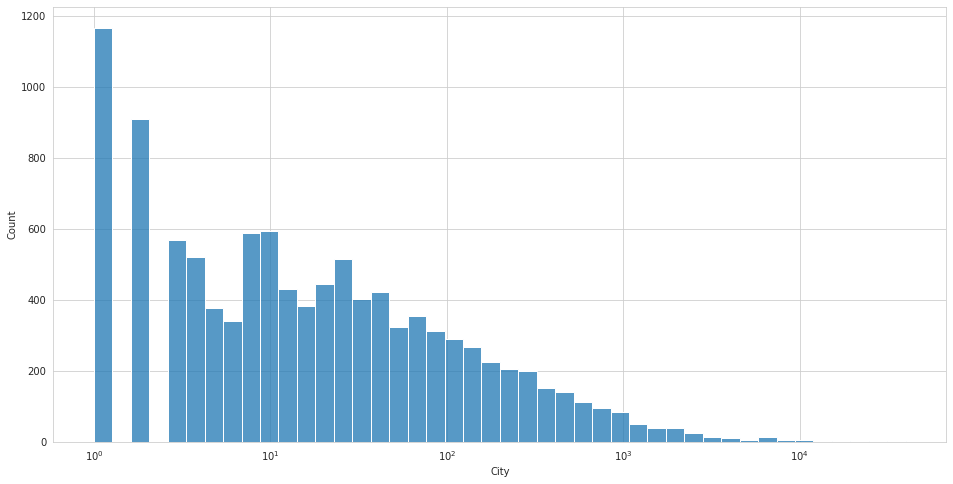

In [ ]:
## Histogram for Accidents per city
plt.figure(figsize=(16,8))
sns.histplot(accidents_per_cities, log_scale=True)

### Start Time

In [ ]:
us_data.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:15:39
4          2016-02-08 06:51:45
                  ...         
1516059    2019-08-23 18:03:25
1516060    2019-08-23 19:11:30
1516061    2019-08-23 19:00:21
1516062    2019-08-23 19:00:21
1516063    2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: object

In [ ]:
us_data.Start_Time[0]

'2016-02-08 00:37:08'

In [ ]:
## Since Start_Time is a string, we have to parse Start_time into workable Date-Time objects
accident_start_time = pd.to_datetime(us_data.Start_Time)
accident_start_time

0         2016-02-08 00:37:08
1         2016-02-08 05:56:20
2         2016-02-08 06:15:39
3         2016-02-08 06:15:39
4         2016-02-08 06:51:45
                  ...        
1516059   2019-08-23 18:03:25
1516060   2019-08-23 19:11:30
1516061   2019-08-23 19:00:21
1516062   2019-08-23 19:00:21
1516063   2019-08-23 18:52:06
Name: Start_Time, Length: 1516064, dtype: datetime64[ns]

In [ ]:
accident_start_time[0]

Timestamp('2016-02-08 00:37:08')

[]

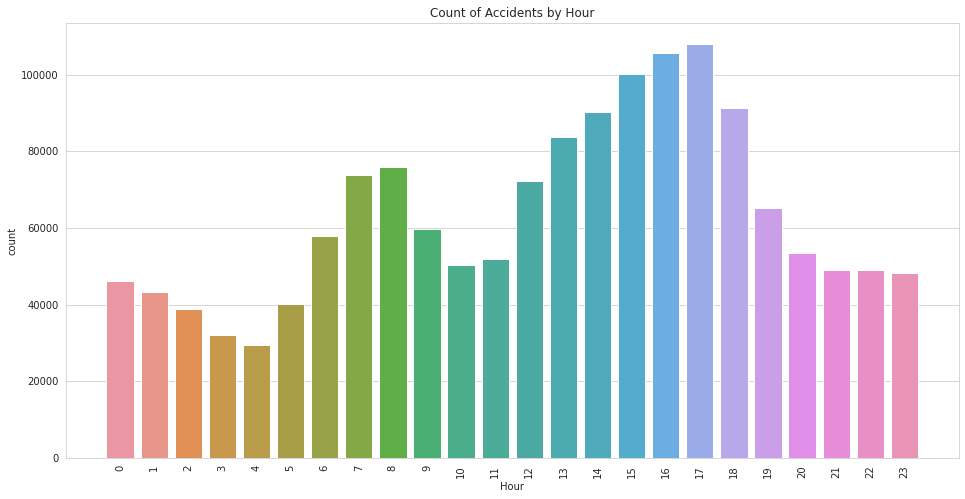

In [ ]:
## Get the hour for each accident timestamp
accident_start_time.dt.hour

## Plot a distribution plot for hours
plt.figure(figsize=(16,8))
sns.countplot(accident_start_time.dt.hour)
plt.title('Count of Accidents by Hour')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Hour')
plt.plot()


[]

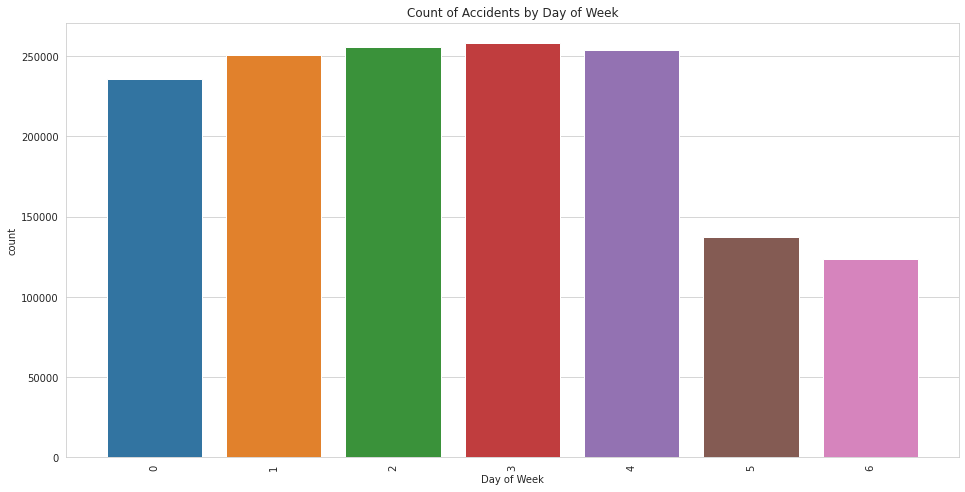

In [ ]:
## Get and plot  the day of the week 
accident_start_time.dt.dayofweek
plt.figure(figsize=(16,8))
sns.countplot(accident_start_time.dt.dayofweek)
plt.title('Count of Accidents by Day of Week')
plt.xticks(np.arange(0,7),np.arange(0,7),rotation=90)
plt.xlabel('Day of Week')
plt.plot()


Accidents occur mainly on the weekdays, Thursday with the highest number of accidents. (Probably because most people are driving to work on those days compared to the weekends when most people are at home)

[]

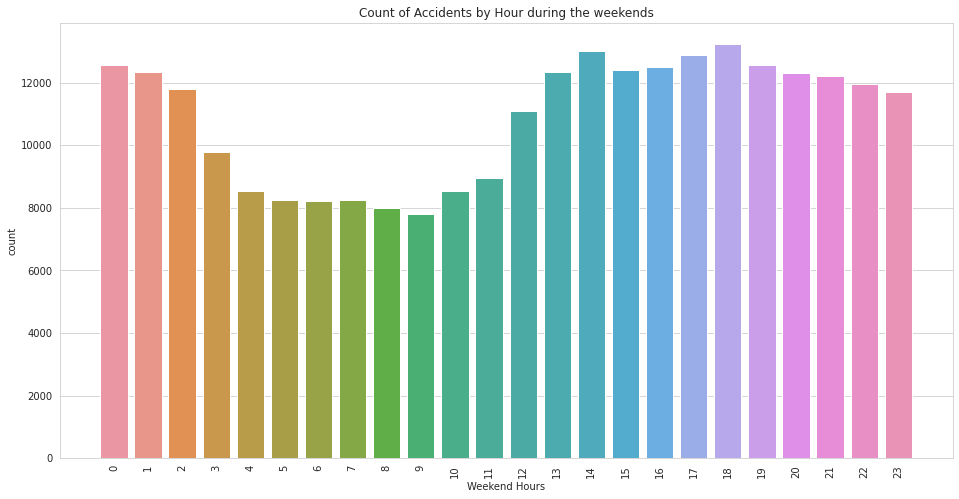

In [ ]:
## Distribution of Accidents on the Weekends 
plt.figure(figsize=(16,8))
weekend_accidents = accident_start_time[accident_start_time.dt.dayofweek>=5]
sns.countplot(weekend_accidents.dt.hour)
plt.title('Count of Accidents by Hour during the weekends')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Weekend Hours')
plt.plot()

[]

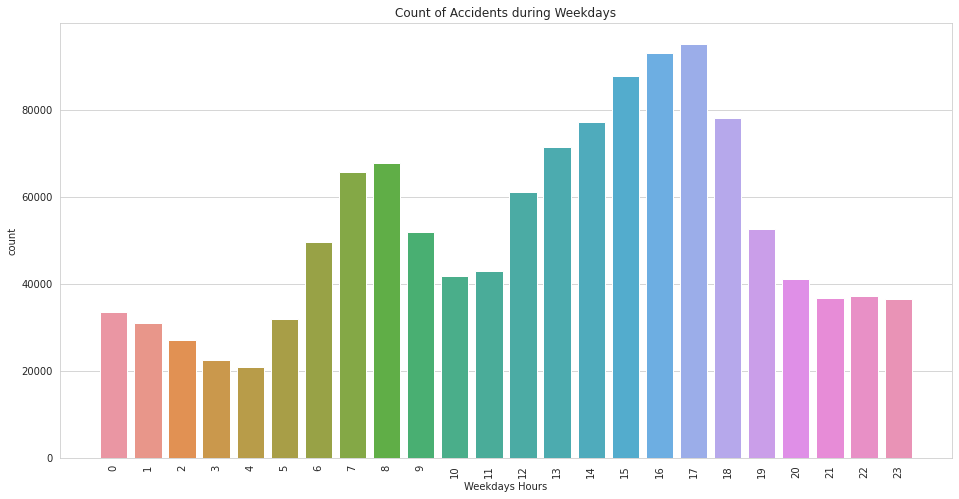

In [ ]:
## Distribution of Accidents on the Weekdays 
plt.figure(figsize=(16,8))
weekday_accidents = accident_start_time[accident_start_time.dt.dayofweek<5]
sns.countplot(weekday_accidents.dt.hour)
plt.title('Count of Accidents during Weekdays')
plt.xticks(np.arange(0,24),np.arange(0,24),rotation=90)
plt.xlabel('Weekdays Hours')
plt.plot()

On the weekends majority of the accidents occur from 1pm to 2am (Probably because most people are driving out to or from parties, festives, events etc) unlike weekdays were the trend tends to peak 1pm to 6pm

[]

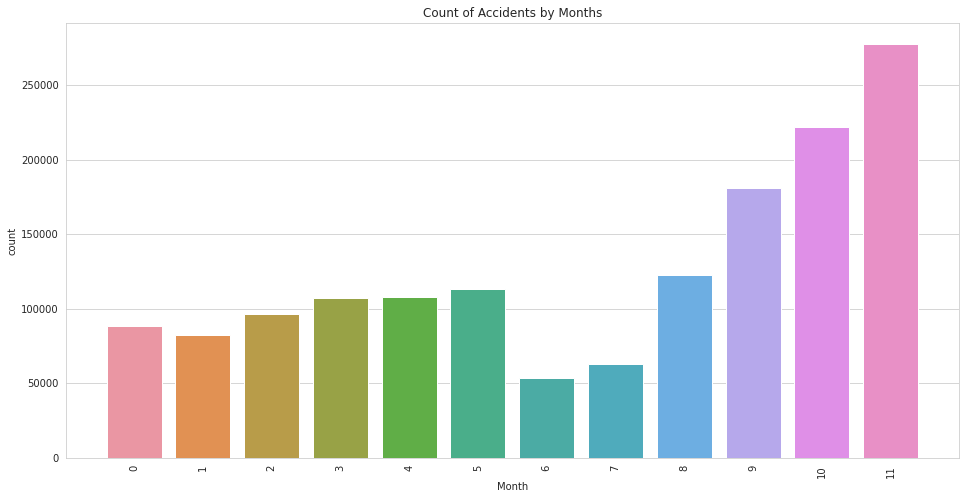

In [ ]:
## Get and plot  the Month
plt.figure(figsize=(16,8))
accident_start_time.dt.month
sns.countplot(accident_start_time.dt.month)
plt.title('Count of Accidents by Months')
plt.xticks(np.arange(0,12),np.arange(0,12),rotation=90)
plt.xlabel('Month')
plt.plot()

December has the highest amount of accidents 

[]

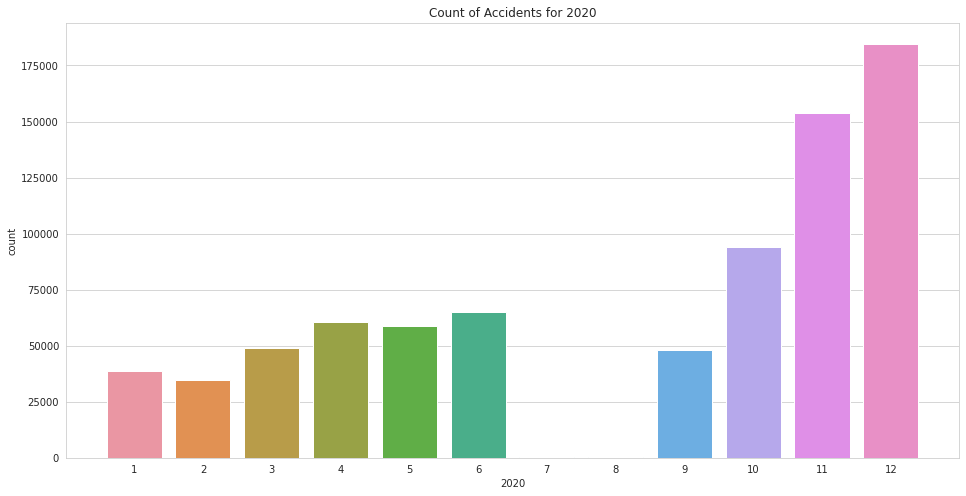

In [ ]:
## Distribution of Accident by Year
plt.figure(figsize=(16,8)) 
accidents_2020 = accident_start_time[accident_start_time.dt.year == 2020]
sns.countplot(accidents_2020.dt.month)
plt.title('Count of Accidents for 2020')
plt.xlabel('2020')
plt.plot()

### Latitude and Longitude

[]

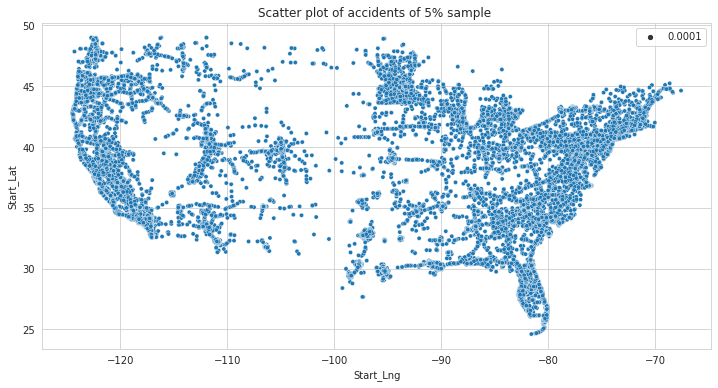

In [ ]:
## Scatter plot of accidents of 5% sample
plt.figure(figsize=(12,6))
sample_us_data = us_data.sample(int(0.05 *len(us_data)))
sns.scatterplot(x = sample_us_data.Start_Lng, y = us_data.Start_Lat, size= 0.0001)
plt.title('Scatter plot of accidents of 5% sample ')
plt.plot()

Coastal areas have alot more accidents than the inner cities and this because the coasts are densely populated.

### Weather Conditions

In [ ]:
weather_conditions = us_data.Weather_Condition.unique()
len(weather_conditions)


117

In [ ]:
### Weather conditions at the time of the Accidents
weather_accidents = us_data.Weather_Condition.value_counts()
weather_accidents

Fair                        465252
Mostly Cloudy               193595
Clear                       180223
Cloudy                      161291
Partly Cloudy               133102
                             ...  
Freezing Rain / Windy            1
Heavy Freezing Drizzle           1
Sleet / Windy                    1
Hail                             1
Thunder and Hail / Windy         1
Name: Weather_Condition, Length: 116, dtype: int64

[]

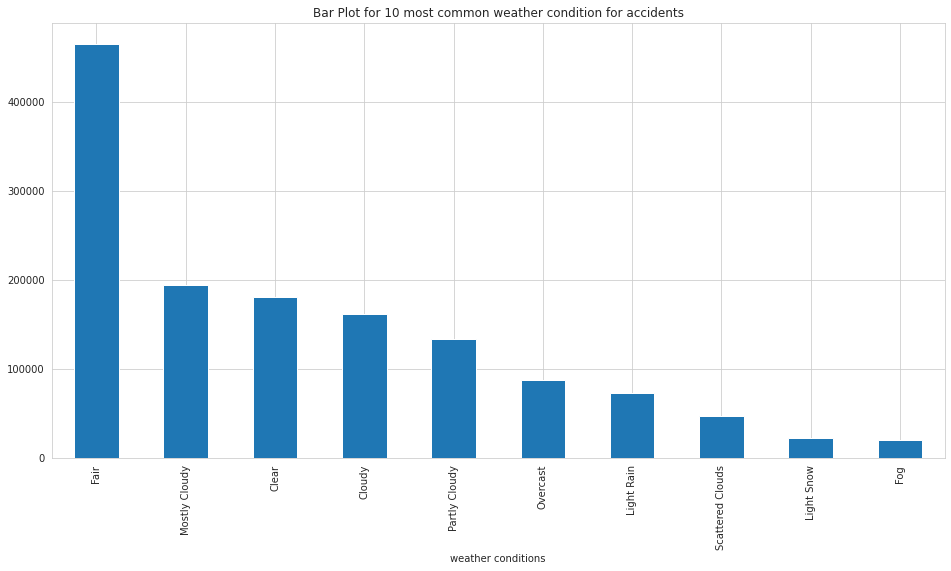

In [ ]:
## Histogram of the 10 most common weather conditions for accidents 
plt.figure(figsize=(16,8))
weather_accidents[:10].plot(kind= 'bar')
plt.title('Bar Plot for 10 most common weather condition for accidents')
plt.xlabel('weather conditions')
plt.plot()

Most accidents happen in fair weather conditions with over 400,000 cases

## Bivariate Analysis


### Analysis for State and Severity Attributes

In [ ]:
severity = us_data.Severity
states = us_data.State.unique()


In [ ]:
## Severity Levels for each State
state_severity = pd.crosstab(columns=us_data.Severity, index=us_data.State)
state_severity

Severity,1,2,3,4
State,,,,
AL,114,7841,786,634
AR,11,3402,302,658
AZ,6695,17620,2229,3641
CA,5544,414365,20603,8321
CO,513,6416,9163,3717
CT,5,10648,2150,2391
DC,42,2617,428,701
DE,7,1060,404,860
FL,2939,129758,11744,8566


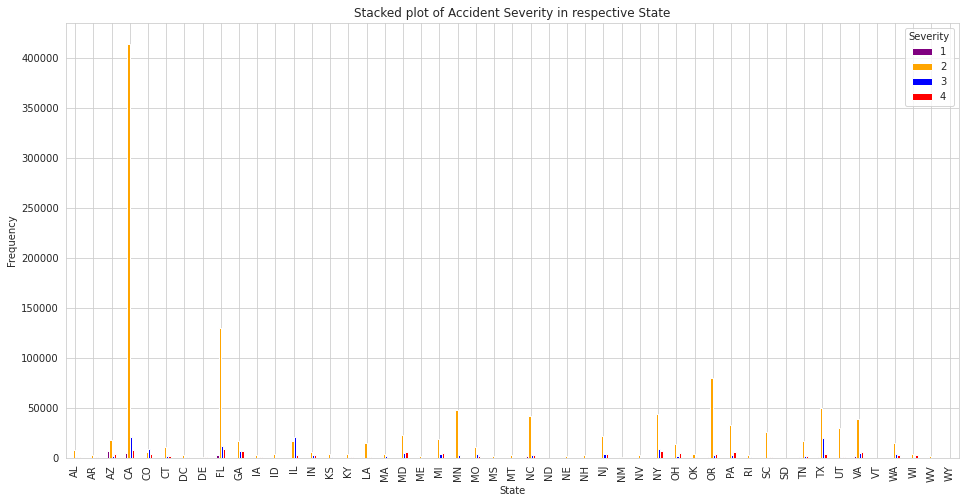

In [ ]:
state_severity.plot(kind='bar',figsize=(16,8),color=['purple','orange','blue','red','green'])
plt.title('Bar plot of Accident Severity in respective State')
plt.ylabel('Frequency')
plt.show()

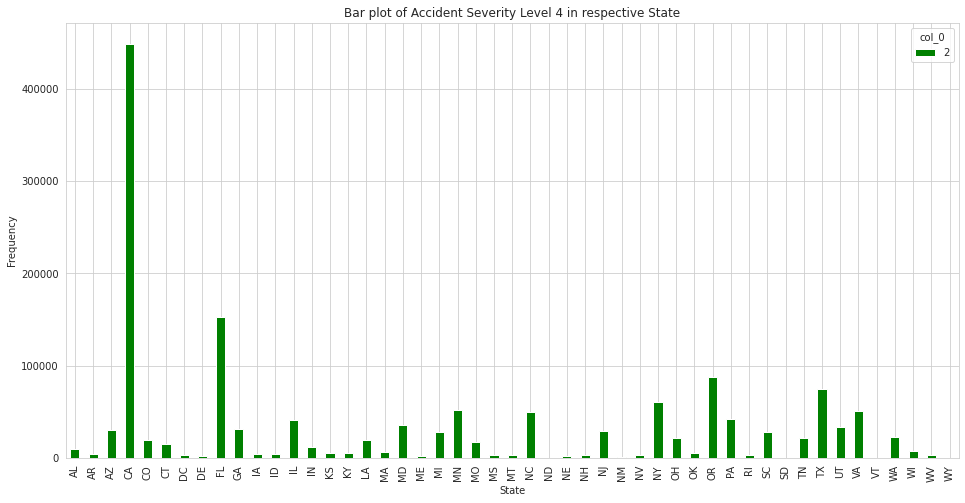

In [ ]:
## States with the most level 4 severity accidents
deadly_state = pd.crosstab(columns=us_data.Severity[4], index=us_data.State)
deadly_state
deadly_state.plot(kind='bar',figsize=(16,8),color='green')
plt.title('Bar plot of Accident Severity Level 4 in respective State')
plt.ylabel('Frequency')
plt.show()


### Wind speed & Severity

(0.0, 100.0)

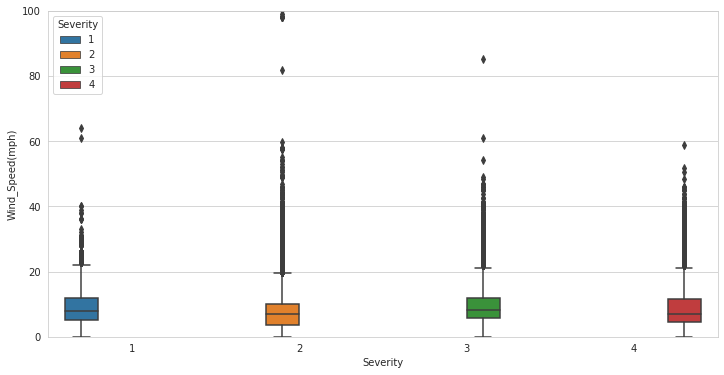

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Severity',y='Wind_Speed(mph)',data=us_data,hue='Severity')
plt.ylim(0,100)

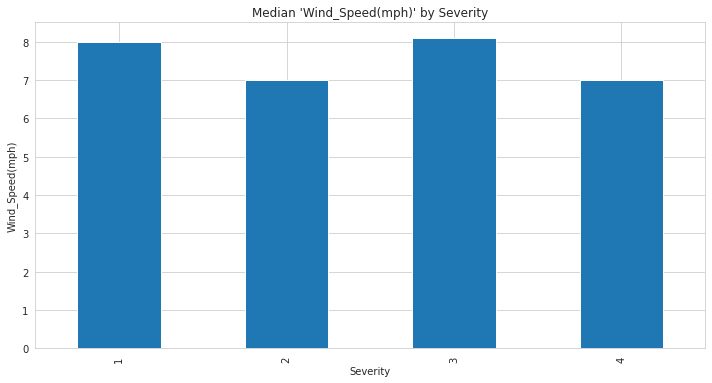

In [ ]:
## Due to many outliers in the plot above, mean would skew the data so median was used
plt.figure(figsize=(12,6))
us_data.groupby('Severity')['Wind_Speed(mph)'].median().plot(kind='bar')
plt.ylabel('Wind_Speed(mph)')
plt.title("Median 'Wind_Speed(mph)' by Severity")
plt.show()

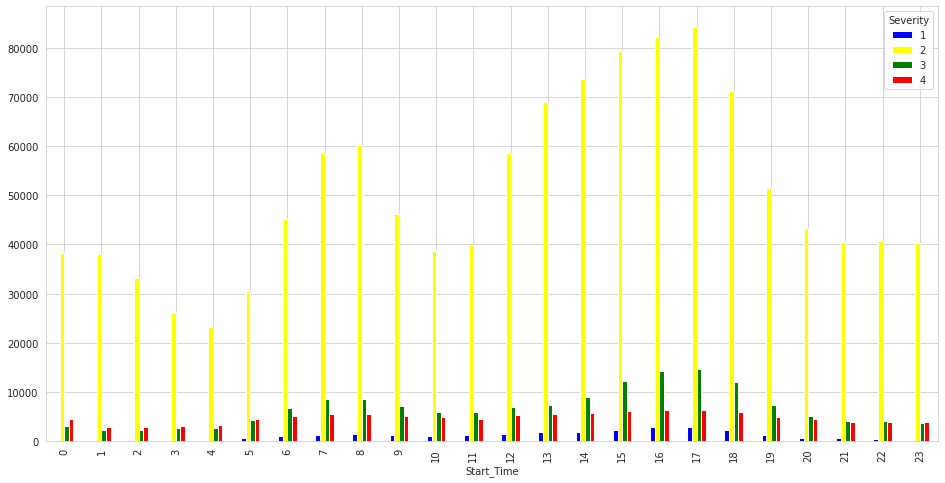

In [ ]:
x = pd.crosstab(index=accident_start_time.dt.hour, columns=us_data.Severity)
x.plot(kind='bar', color=['blue','yellow','green','red'],figsize=(16,8))
plt.show()

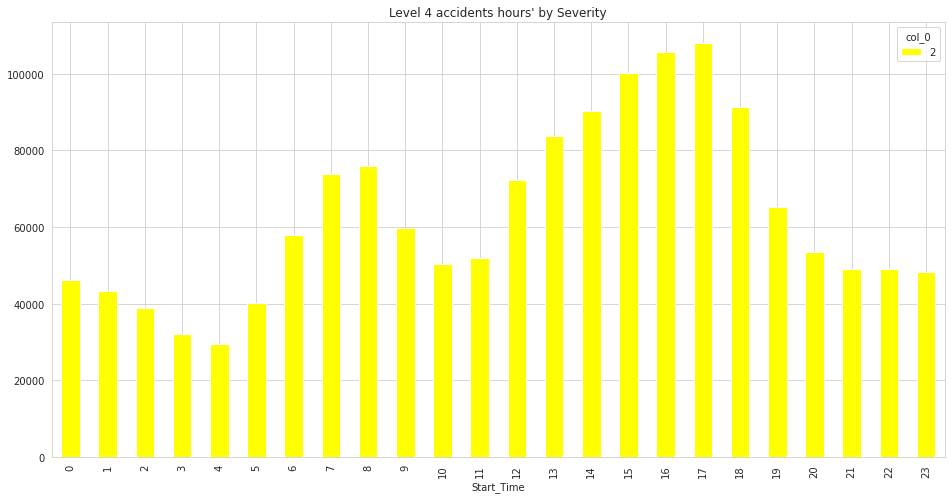

In [ ]:
deadliest_hours = pd.crosstab(index=accident_start_time.dt.hour, columns=us_data.Severity[4])
deadliest_hours.plot(kind='bar',color='yellow', figsize=(16,8))
plt.title("Level 4 accidents hours' by Severity")
plt.show()

## ASK & ANSWER QUESTIONS
- Which 10 cities has the highest number of accidents?
  - Los Angeles, Miami, Charlotte, Houston, Dallas, Sacramento, Orlando, Portland, San Diego, Minneapolis. 

- What time of the day, weekday, months are accidents most frequent in?
  - Most accidents happen between 3pm and 6pm and also in the morning between 7am and 9am
  - Accidents occur mainly on the weekdays, Thursday with the highest number of accidents. 
  - On the weekends majority of the accidents occur from 1pm to 2am unlike weekdays were the trend tends to peak 1pm to 6pm
  - December is the month with the highest number of accidents

- What are the locatioms on the US map most accidents happen?
  -  Most of the accidents happen in the coastal cities in the US as shown by the density of the scatter plot above 

- What are the most common weather conditions accidents occer in?
  - Most accidents happen in fair weather conditions with over 400000 cases reported. This is foolowed by mostly cloudy and clear weather conditions
- Is Wind_Speed a factor that influences accident Severity?
  - From the median plot it's inconclusive. It seems the distribution amongst the respective severities is somewhat similar though it  seems to be more accidents happen Severity 1 and 2 

- At what time do majority of level 4 severity accidents happen?
  - From the bar plots, most level severity accidents happpen at 5pm.(This might be related to of alot of traffic in the evening hours)

## Summary & Conculsion
Insights ;
- The number of accidents follows an exponential distributions
- The histogram above shows over 1200 cities had less than 10 accidents
-  About 2% of the cities had over 1000 accidents yearly
-  High percentage of accidents occur between 1pm to 6pm and the next from 6am to 9am

### Areas for future analysis

The remaining Columns, Multivariate analysis and some clustering


In [ ]:
import jovian

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/duncansembeguya/us-accidents-eda


'https://jovian.ai/duncansembeguya/us-accidents-eda'